In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
print(matplotlib.__version__)

3.5.1


### 데이터 불러오기

In [3]:
df = pd.read_csv("./train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 확인

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 데이터 시각화

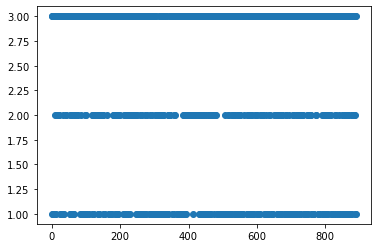

In [8]:
plt.plot(df['Pclass'], 'o')

In [9]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

클래스 별 승객들의 수를 나타낸다

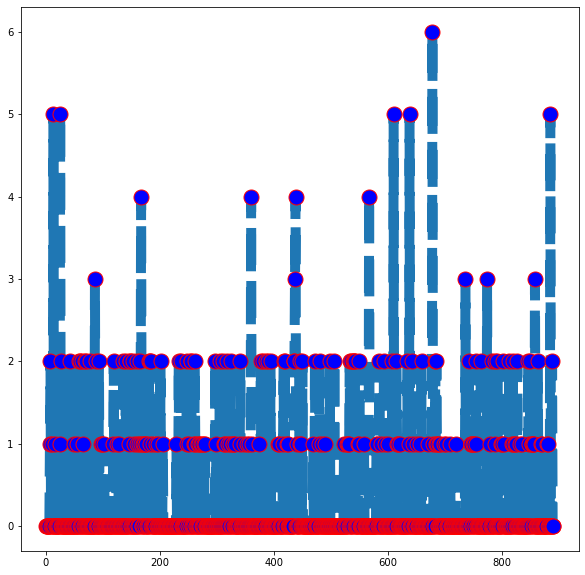

In [10]:
plt.figure(figsize = (10,10))
plt.plot(df['Parch'], 'o--', ms = 15, mec = 'r', mfc = 'b', lw = 10, )

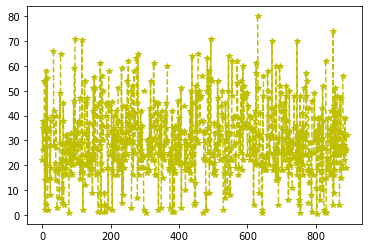

In [11]:
plt.plot(df['Age'], '*y--')

In [12]:
df['Age'].mean()

29.69911764705882

승객들의 나이의 분포를 나타낸다

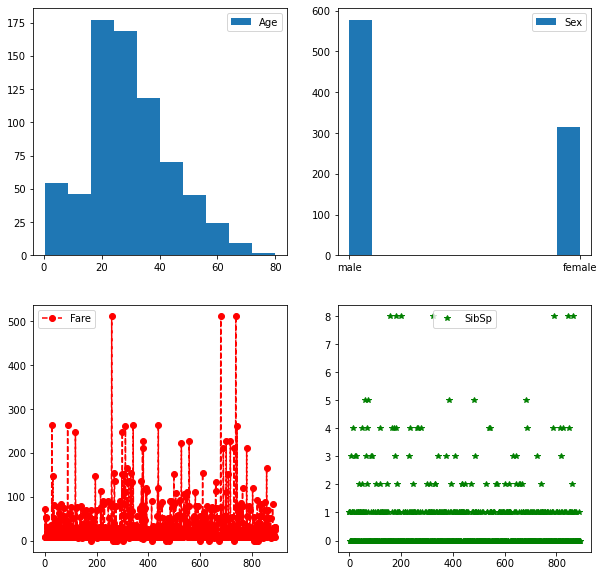

In [13]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.hist(df["Age"], label='Age')
plt.legend(loc=0)

plt.subplot(2,2,2)
plt.hist(df["Sex"], label='Sex')
plt.legend(loc=0)

plt.subplot(2,2,3)
plt.plot(df["Fare"], 'o--r',label='Fare')
plt.legend(loc=0)

plt.subplot(2,2,4)
plt.plot(df["SibSp"], '*g',label='SibSp')
plt.legend(loc=0)

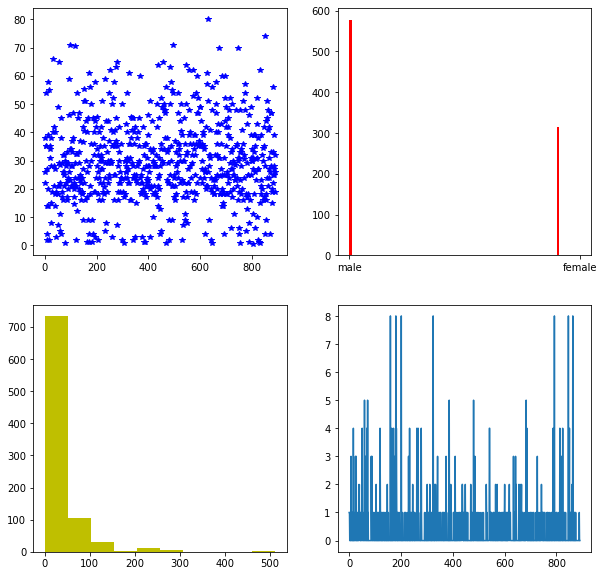

In [14]:
fig,axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].plot(df["Age"], 'b*' )
axs[0,1].hist(df["Sex"], color = 'red', width = 0.01)
axs[1,0].hist(df["Fare"], color = 'y')
axs[1,1].plot(df["SibSp"] )

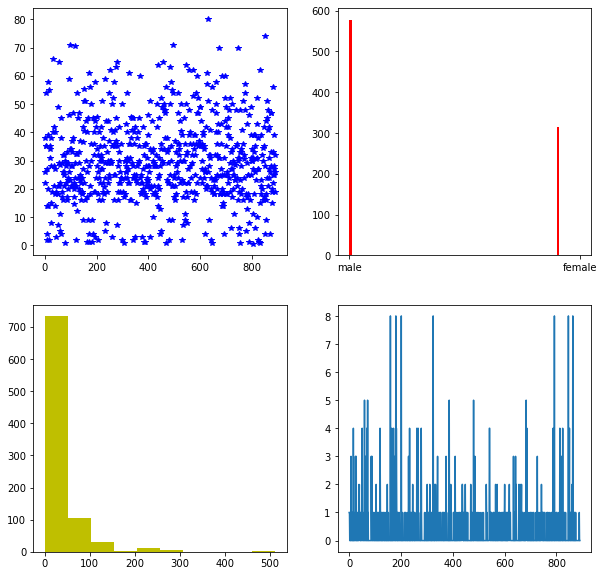

In [15]:
#fig,axs = plt.subplots(2,2, figsize=(10,10))
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(df["Age"], 'b*' )
ax2.hist(df["Sex"], color = 'red', width = 0.01)
ax3.hist(df["Fare"], color = 'y')
ax4.plot(df["SibSp"] )

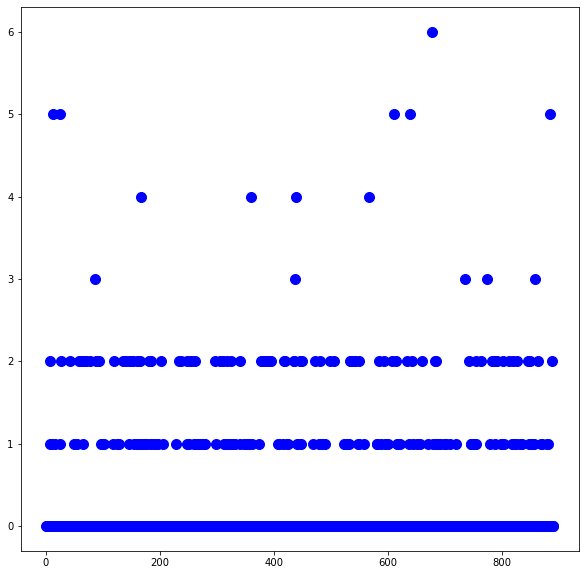

In [16]:
plt.figure(figsize = (10,10))
plt.plot(df['Parch'], 'bo', ms= 10)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


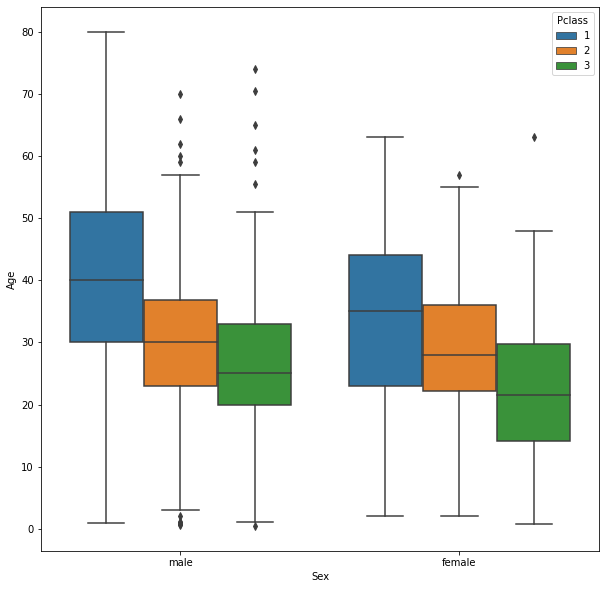

In [18]:
# 클래스와 성별에 따른 나이의 분포
plt.figure(figsize=(10,10))

sns.boxplot(x="Sex", y='Age', hue ='Pclass', data=df)
plt.show()

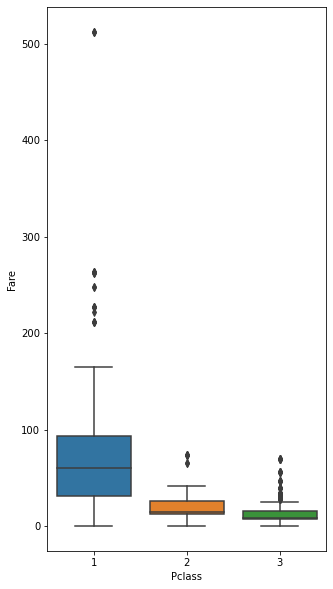

In [19]:
# 등급과 운임비용의 관계
plt.figure(figsize=(5,10))
sns.boxplot(x='Pclass', y='Fare', data = df)
plt.show()

<Figure size 720x720 with 0 Axes>

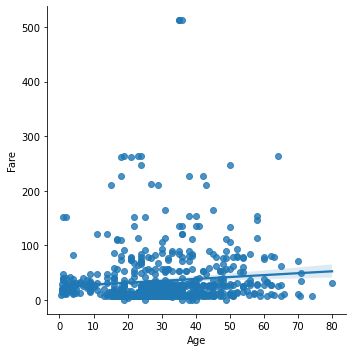

In [20]:
#나이와 운임비용간의 상관관계
plt.figure(figsize=(10,10))

sns.lmplot(x="Age", y="Fare",data = df)

plt.show()

<Figure size 720x720 with 0 Axes>

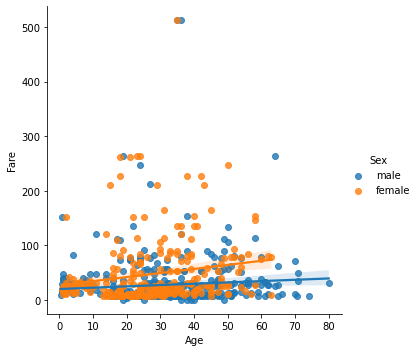

In [21]:
#나이와 운임비용간의 상관관계
plt.figure(figsize=(10,10))

sns.lmplot(x="Age", y="Fare", hue="Sex",data = df)

plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

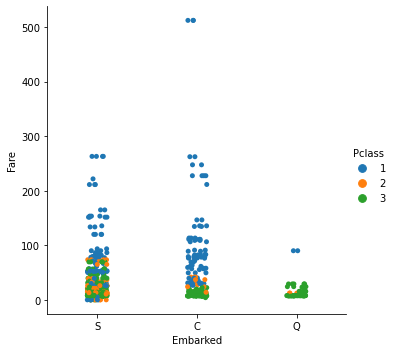

In [24]:
# 클래스와 승선지,운임비용간의 관계
plt.figure(figsize=(10,10))

sns.catplot(x="Embarked", y="Fare", hue="Pclass",data = df)

plt.show()

<Figure size 720x720 with 0 Axes>

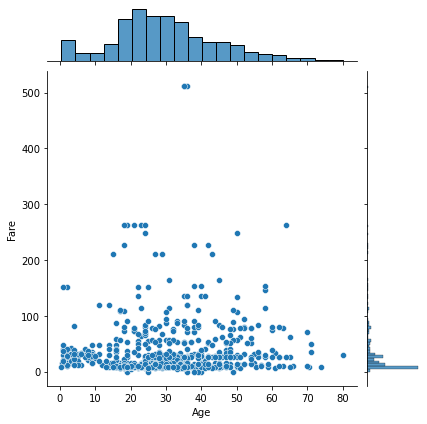

In [25]:
# 나이와 운임비용간의 관계
plt.figure(figsize=(10,10))

sns.jointplot(x="Age", y="Fare",data = df)

plt.show()

<Figure size 720x720 with 0 Axes>

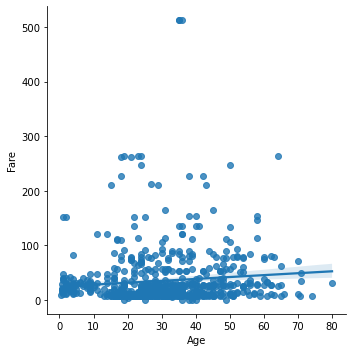

In [26]:
# 클래스와 승선지,운임비용간의 관계
plt.figure(figsize=(10,10))

sns.lmplot(x="Age", y="Fare",data = df)

plt.show()

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Figure size 720x720 with 0 Axes>

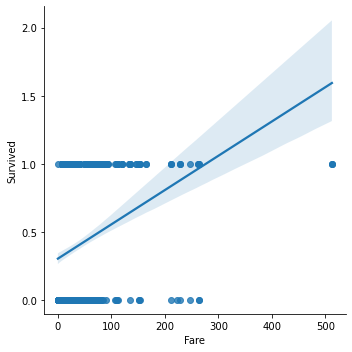

In [32]:
# 운임비용과 생존자의 관계
plt.figure(figsize=(10,10))

sns.lmplot(x="Fare", y="Survived",data = df)

plt.show()

<Figure size 720x720 with 0 Axes>

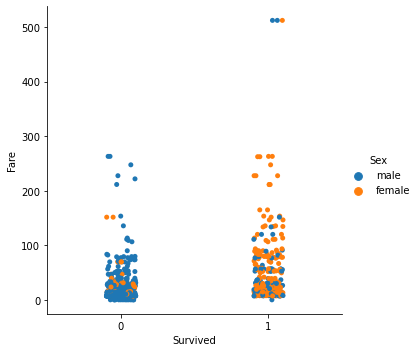

In [43]:
plt.figure(figsize=(10,10))

sns.catplot(x="Survived", y="Fare", hue = "Sex", data = df)

plt.show()